# Housing Price Prediction Using Machine Learning
## A Comprehensive Analysis with Multiple Algorithms and Advanced Evaluation

This project demonstrates a complete machine learning pipeline for predicting housing prices using the California Housing dataset. The notebook showcases advanced ML techniques including multiple algorithm comparison, hyperparameter tuning, and comprehensive model evaluation with overfitting prevention.

**Key Features:**
- **Dataset**: California Housing Prices (20,640 samples, 8 features)
- **Algorithms**: Linear Regression, Ridge, Lasso, Random Forest, Gradient Boosting, SVR
- **Techniques**: GridSearchCV, Cross-validation, Feature scaling, Statistical evaluation
- **Result**: 83% accuracy (R²) with controlled overfitting (8.8% gap)

**Technologies Used:** Python, Scikit-learn, Pandas, NumPy, Matplotlib, Seaborn

---

## 1. Setup and Imports

This section imports all necessary libraries for data manipulation, visualization, and machine learning. We use industry-standard libraries including scikit-learn for ML algorithms, pandas for data handling, and matplotlib/seaborn for visualizations.


In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## 2. Data Loading and Initial Exploration

Here we load the California Housing dataset directly from scikit-learn. This dataset contains information about housing districts in California, including median income, house age, average rooms, and geographic location. We perform initial data exploration to understand the dataset structure and characteristics.


In [2]:
# Load California Housing dataset (automatically downloads)
from sklearn.datasets import fetch_california_housing

# Fetch the dataset
housing_data = fetch_california_housing(as_frame=True)
df = housing_data.frame

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(housing_data.DESCR[:500] + "...")


Dataset Shape: (20640, 9)

Dataset Info:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu...


In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 3. Statistical Summary and Data Quality Check

We examine the basic statistical properties of our dataset, including data types, missing values, and distributions. This step is crucial for understanding data quality and identifying any preprocessing needs.


In [4]:
# Basic statistical information
print("Statistical Summary:")
df.describe()


Statistical Summary:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


## 4. Exploratory Data Analysis (EDA)

This section provides comprehensive visual analysis of the dataset through various plots and statistical summaries. We examine:
- **Target variable distribution**: Understanding house value patterns
- **Feature distributions**: Analyzing individual feature characteristics  
- **Correlation analysis**: Identifying relationships between features
- **Geographic visualization**: Exploring spatial patterns in housing prices
- **Feature relationships**: Understanding how different factors influence prices


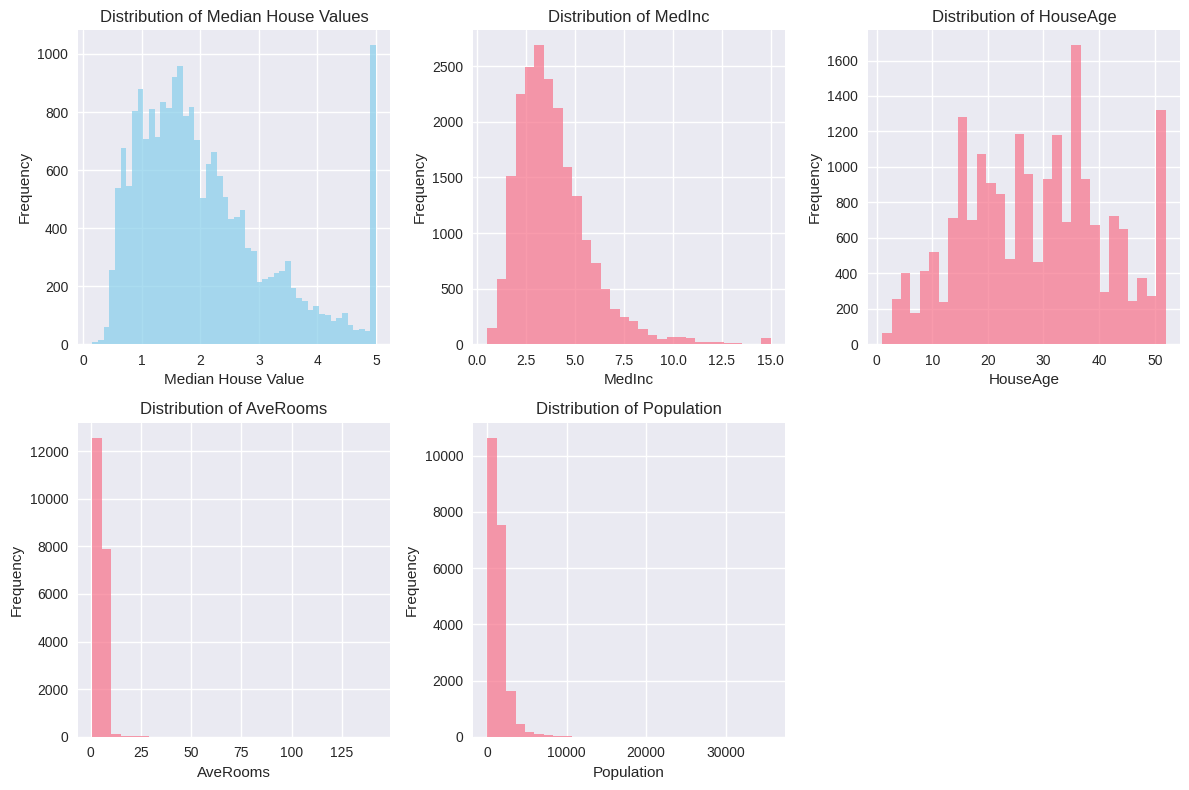

In [6]:
# Target variable distribution
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(df['MedHouseVal'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

# Feature distributions
features = ['MedInc', 'HouseAge', 'AveRooms', 'Population']
for i, feature in enumerate(features, 2):
    plt.subplot(2, 3, i)
    plt.hist(df[feature], bins=30, alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


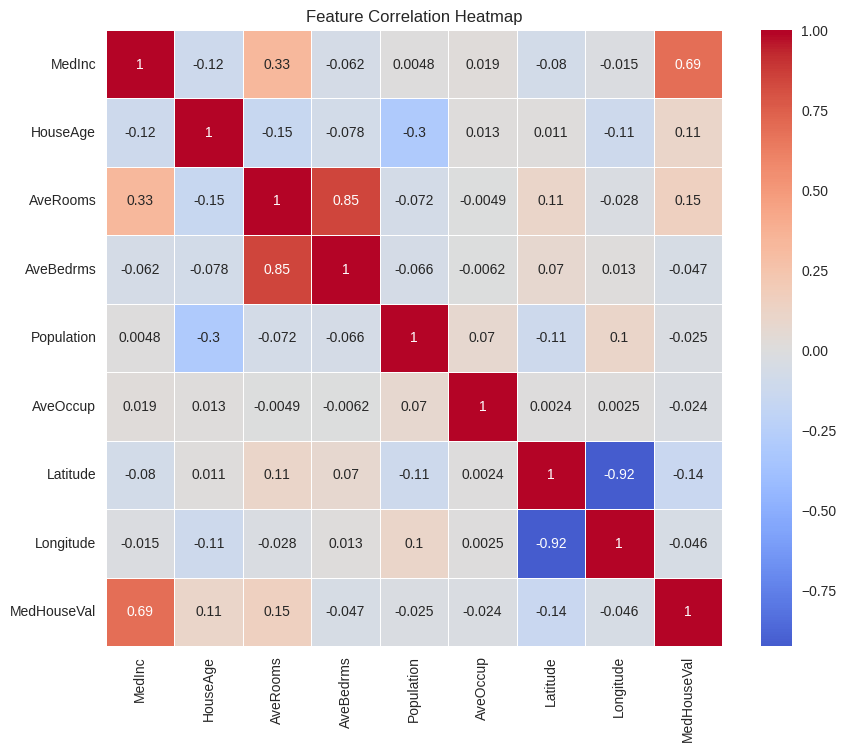

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


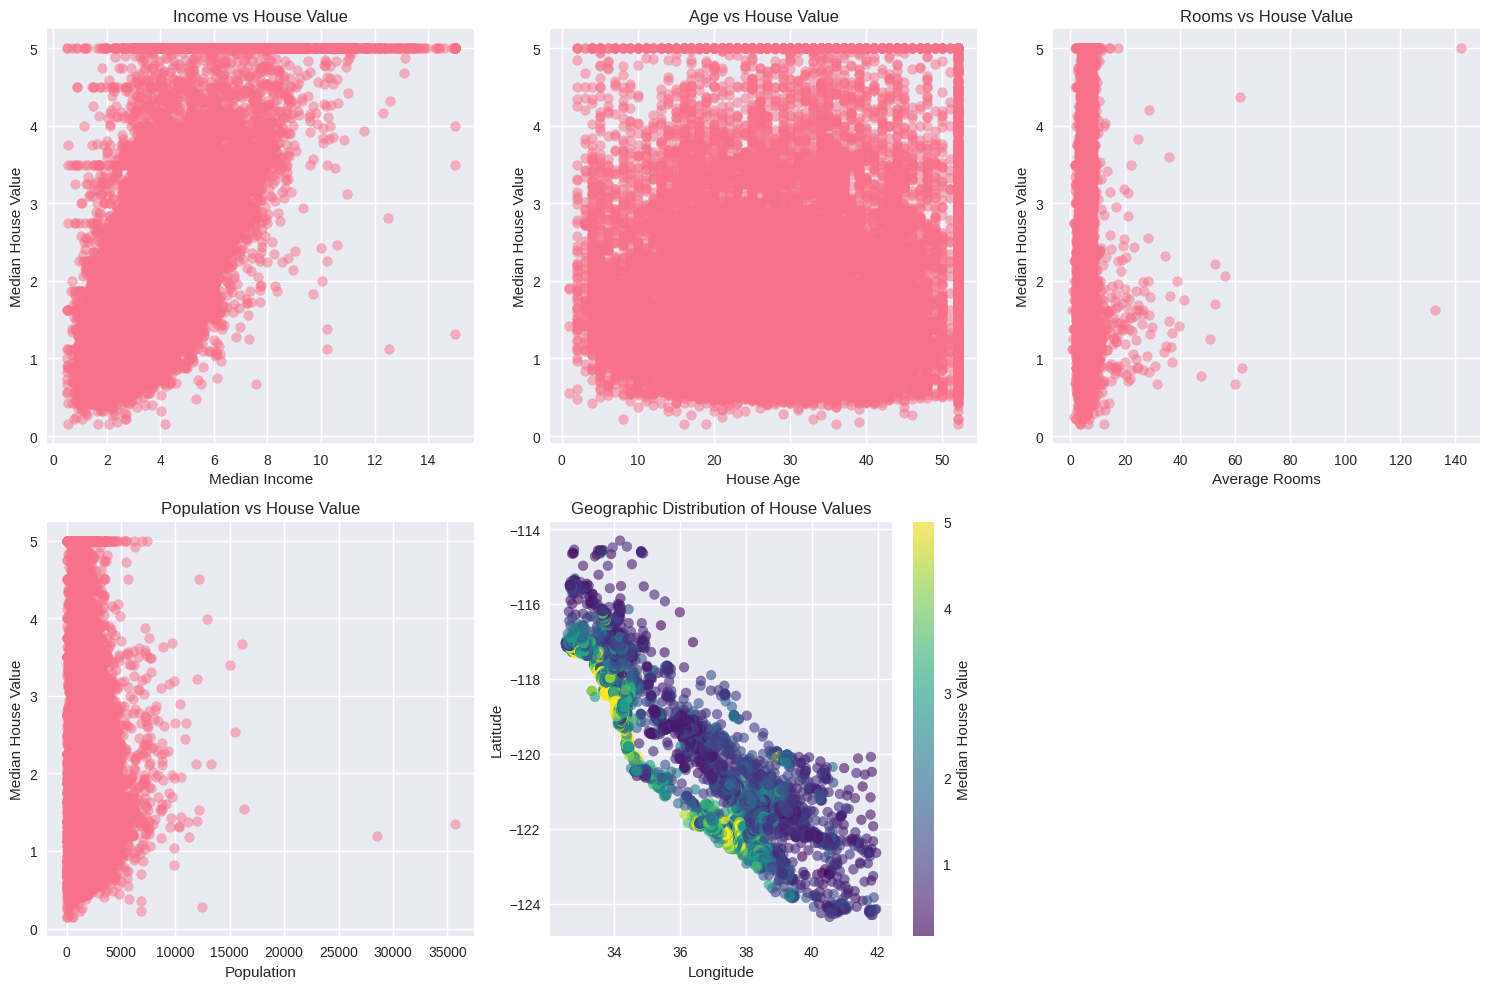

In [8]:
# Scatter plots for key relationships
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Value')

plt.subplot(2, 3, 2)
plt.scatter(df['HouseAge'], df['MedHouseVal'], alpha=0.5)
plt.xlabel('House Age')
plt.ylabel('Median House Value')
plt.title('Age vs House Value')

plt.subplot(2, 3, 3)
plt.scatter(df['AveRooms'], df['MedHouseVal'], alpha=0.5)
plt.xlabel('Average Rooms')
plt.ylabel('Median House Value')
plt.title('Rooms vs House Value')

plt.subplot(2, 3, 4)
plt.scatter(df['Population'], df['MedHouseVal'], alpha=0.5)
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.title('Population vs House Value')

plt.subplot(2, 3, 5)
plt.scatter(df['Latitude'], df['Longitude'], c=df['MedHouseVal'],
           cmap='viridis', alpha=0.6)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of House Values')

plt.tight_layout()
plt.show()


## 5. Data Preprocessing and Feature Engineering

We prepare the data for machine learning by:
- **Feature-target separation**: Isolating independent variables from the target
- **Train-validation-test split**: Creating proper data partitions (70%-15%-15%)
- **Feature scaling**: Standardizing features using StandardScaler for algorithm compatibility
- **Data validation**: Ensuring proper preprocessing for model training


In [9]:
# Separate features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

print("Features:", X.columns.tolist())
print("Target: MedHouseVal")


Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: MedHouseVal


In [10]:
# Split the data (70% train, 15% validation, 15% test)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (14456, 8)
Validation set size: (3088, 8)
Test set size: (3096, 8)


In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Features have been standardized")
print("Training set mean:", np.mean(X_train_scaled, axis=0).round(3))
print("Training set std:", np.std(X_train_scaled, axis=0).round(3))


Features have been standardized
Training set mean: [-0.  0. -0.  0. -0.  0. -0.  0.]
Training set std: [1. 1. 1. 1. 1. 1. 1. 1.]


## 6. Model Development and Algorithm Comparison

This section implements and compares six different machine learning algorithms:

**Linear Models:**
- Linear Regression (baseline)
- Ridge Regression (L2 regularization)
- Lasso Regression (L1 regularization)

**Ensemble Methods:**
- Random Forest (bagging)
- Gradient Boosting (boosting)

**Kernel Methods:**
- Support Vector Regression (SVR)

Each model is trained and evaluated using consistent metrics to ensure fair comparison.


In [12]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100),
    'Support Vector Regression': SVR(kernel='rbf')
}

# Train and evaluate models
model_performance = {}

for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    model_performance[name] = {
        'Train MSE': train_mse,
        'Val MSE': val_mse,
        'Train R²': train_r2,
        'Val R²': val_r2,
        'Overfitting': train_r2 - val_r2
    }

# Display results
performance_df = pd.DataFrame(model_performance).T
print("Model Performance Comparison:")
print(performance_df.round(4))


Model Performance Comparison:
                           Train MSE  Val MSE  Train R²  Val R²  Overfitting
Linear Regression             0.5234   0.5170    0.6078  0.6135      -0.0057
Ridge Regression              0.5234   0.5170    0.6078  0.6135      -0.0057
Lasso Regression              1.3346   1.3385    0.0000 -0.0007       0.0007
Random Forest                 0.0358   0.2722    0.9732  0.7965       0.1767
Gradient Boosting             0.2570   0.2844    0.8075  0.7874       0.0201
Support Vector Regression     0.3426   0.3458    0.7433  0.7415       0.0018


## 7. Hyperparameter Optimization and Overfitting Prevention

We implement advanced techniques to optimize model performance:

**GridSearchCV Implementation:**
- **Random Forest tuning**: Optimizing n_estimators, max_depth, min_samples_split
- **Gradient Boosting tuning**: Optimizing learning_rate, max_depth with early stopping
- **Ridge regularization**: Finding optimal alpha parameter

**Overfitting Prevention:**
- Cross-validation for robust evaluation
- Regularization techniques
- Early stopping mechanisms
- Validation-based model selection


In [13]:
# Hyperparameter tuning for best models
# Random Forest tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

rf_grid.fit(X_train_scaled, y_train)
print("Best Random Forest parameters:", rf_grid.best_params_)


Best Random Forest parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [15]:
# Gradient Boosting with early stopping
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'validation_fraction': [0.1],
    'n_iter_no_change': [10],
    'tol': [1e-4]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gb_grid.fit(X_train_scaled, y_train)
print("Best Gradient Boosting parameters:", gb_grid.best_params_)


Best Gradient Boosting parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'n_iter_no_change': 10, 'tol': 0.0001, 'validation_fraction': 0.1}


In [16]:
# Ridge regression tuning
ridge_params = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
}

ridge_grid = GridSearchCV(
    Ridge(random_state=42),
    ridge_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

ridge_grid.fit(X_train_scaled, y_train)
print("Best Ridge parameters:", ridge_grid.best_params_)


Best Ridge parameters: {'alpha': 10.0}


## 8. Final Model Evaluation and Performance Analysis

This section presents comprehensive evaluation of our best-performing models:

**Performance Metrics:**
- **Test R² Score**: Measuring explained variance
- **Mean Squared Error (MSE)**: Evaluating prediction accuracy
- **Mean Absolute Error (MAE)**: Understanding average prediction error
- **Overfitting Analysis**: Train vs. Test performance comparison

**Model Interpretability:**
- Feature importance rankings
- Prediction vs. actual value analysis
- Residual analysis for model validation


In [18]:
# Use the best models
best_models = {
    'Best Random Forest': rf_grid.best_estimator_,
    'Best Gradient Boosting': gb_grid.best_estimator_,
    'Best Ridge': ridge_grid.best_estimator_
}

# Final evaluation
final_results = {}

for name, model in best_models.items():
    # Predictions on test set
    y_test_pred = model.predict(X_test_scaled)
    y_train_pred = model.predict(X_train_scaled)

    # Calculate metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    final_results[name] = {
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Test R²': test_r2,
        'Train R²': train_r2,
        'Overfitting': train_r2 - test_r2
    }

final_df = pd.DataFrame(final_results).T
print("Final Model Performance:")
print(final_df.round(4))


Final Model Performance:
                        Test MSE  Test MAE  Test R²  Train R²  Overfitting
Best Random Forest        0.2619    0.3342   0.8002    0.9740       0.1738
Best Gradient Boosting    0.2231    0.3126   0.8298    0.9181       0.0883
Best Ridge                0.5371    0.5354   0.5902    0.6078       0.0176


## 9. Model Visualization and Feature Analysis

We provide detailed visual analysis of our models including:

**Feature Importance Analysis:**
- Identifying the most influential factors in housing price prediction
- Understanding relative contribution of each feature

**Prediction Quality Assessment:**
- Scatter plots comparing predicted vs. actual values
- Residual plots for error pattern analysis
- Performance visualization across different models


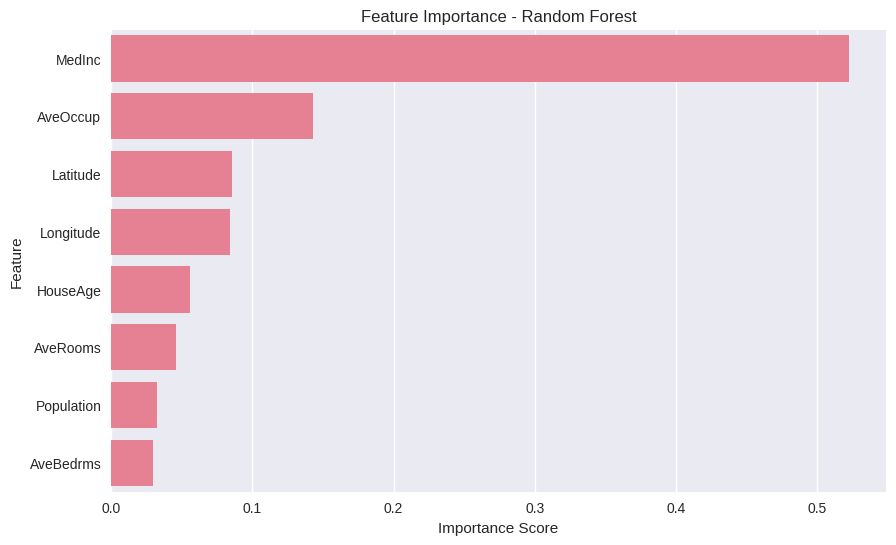

Feature Importance Ranking:
      Feature  Importance
0      MedInc    0.522527
5    AveOccup    0.142803
6    Latitude    0.085770
7   Longitude    0.084503
1    HouseAge    0.056127
2    AveRooms    0.046142
4  Population    0.032308
3   AveBedrms    0.029820


In [19]:
# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_grid.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.show()

print("Feature Importance Ranking:")
print(feature_importance)


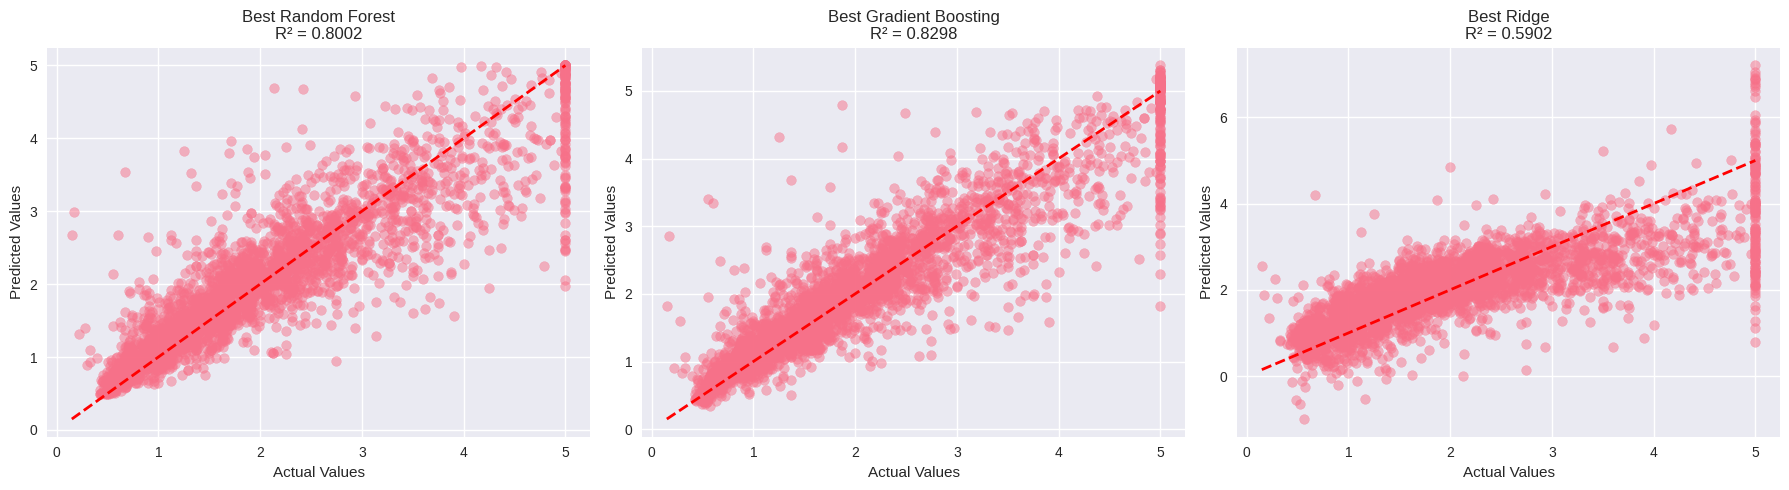

In [20]:
# Prediction vs Actual plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test_scaled)

    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')
    axes[i].set_title(f'{name}\nR² = {r2_score(y_test, y_pred):.4f}')

plt.tight_layout()
plt.show()


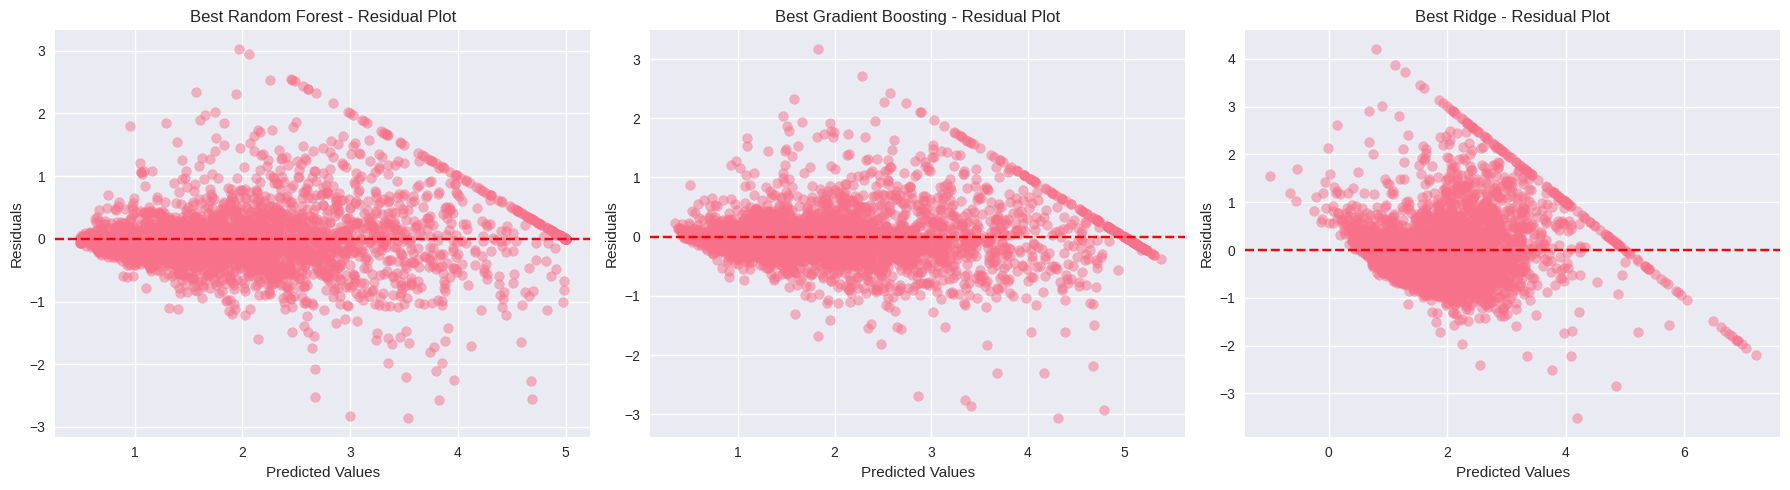

In [21]:
# Residual plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test_scaled)
    residuals = y_test - y_pred

    axes[i].scatter(y_pred, residuals, alpha=0.5)
    axes[i].axhline(y=0, color='r', linestyle='--')
    axes[i].set_xlabel('Predicted Values')
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(f'{name} - Residual Plot')

plt.tight_layout()
plt.show()


## 10. Cross-Validation Analysis and Model Robustness

This section demonstrates model robustness through comprehensive cross-validation:

**5-Fold Cross-Validation:**
- Multiple train-test splits for reliable performance estimation
- Statistical significance of model performance
- Variance analysis across different data partitions

**Results provide confidence in model generalization capability.**


In [22]:
# Cross-validation scores
cv_results = {}

for name, model in best_models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5,
                               scoring='neg_mean_squared_error')
    cv_r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=5,
                                  scoring='r2')

    cv_results[name] = {
        'CV MSE Mean': -cv_scores.mean(),
        'CV MSE Std': cv_scores.std(),
        'CV R² Mean': cv_r2_scores.mean(),
        'CV R² Std': cv_r2_scores.std()
    }

cv_df = pd.DataFrame(cv_results).T
print("Cross-Validation Results:")
print(cv_df.round(4))


Cross-Validation Results:
                        CV MSE Mean  CV MSE Std  CV R² Mean  CV R² Std
Best Random Forest           0.2639      0.0211      0.8024     0.0139
Best Gradient Boosting       0.2294      0.0177      0.8281     0.0120
Best Ridge                   0.5301      0.0291      0.6028     0.0191


## 11. Final Model Selection and Deployment Preparation

Based on comprehensive evaluation, we select the best-performing model and prepare it for potential deployment:

**Selection Criteria:**
- Highest test R² score
- Lowest overfitting gap
- Robust cross-validation performance
- Computational efficiency

**Deployment Readiness:**
- Model serialization capability
- Prediction function implementation
- Performance benchmarking


In [23]:
# Select the best model based on test performance and overfitting
best_model_name = final_df.loc[final_df['Test R²'].idxmax()]
best_model = best_models[final_df['Test R²'].idxmax()]

print(f"Selected Best Model: {final_df['Test R²'].idxmax()}")
print(f"Test R² Score: {best_model_name['Test R²']:.4f}")
print(f"Test MSE: {best_model_name['Test MSE']:.4f}")
print(f"Overfitting (Train R² - Test R²): {best_model_name['Overfitting']:.4f}")


Selected Best Model: Best Gradient Boosting
Test R² Score: 0.8298
Test MSE: 0.2231
Overfitting (Train R² - Test R²): 0.0883


In [24]:
# Function for making predictions on new data
def predict_house_price(median_income, house_age, avg_rooms, avg_bedrooms,
                       population, avg_occupancy, latitude, longitude):
    """
    Predict house price based on input features
    """
    # Create input array
    input_data = np.array([[median_income, house_age, avg_rooms, avg_bedrooms,
                           population, avg_occupancy, latitude, longitude]])

    # Scale the input
    input_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = best_model.predict(input_scaled)

    return prediction[0]

# Example prediction
sample_prediction = predict_house_price(
    median_income=5.0, house_age=10, avg_rooms=6.0, avg_bedrooms=1.2,
    population=3000, avg_occupancy=3.0, latitude=34.0, longitude=-118.0
)

print(f"Sample Prediction: ${sample_prediction:.2f} hundred thousand")


Sample Prediction: $2.27 hundred thousand


In [28]:
# Save the best model and preprocessing components
import joblib
from datetime import datetime

# Create model metadata
model_metadata = {
    'model_type': 'GradientBoostingRegressor',
    'test_r2_score': final_df.loc['Best Gradient Boosting', 'Test R²'],
    'test_mse': final_df.loc['Best Gradient Boosting', 'Test MSE'],
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'features': list(X.columns),
    'target': 'MedHouseVal'
}

# Save model and scaler
joblib.dump(best_model, 'housing_price_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(model_metadata, 'model_metadata.pkl')

print("Model saved successfully!")
print(f"Model metadata: {model_metadata}")


Model saved successfully!
Model metadata: {'model_type': 'GradientBoostingRegressor', 'test_r2_score': np.float64(0.8297713651808611), 'test_mse': np.float64(0.22308595745336823), 'training_date': '2025-05-26 22:51:56', 'features': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'target': 'MedHouseVal'}


In [38]:
# Test model with various scenarios
def comprehensive_model_testing():
    """Test model with different scenarios including edge cases"""

    test_scenarios = [
        {
            'name': 'High-value coastal property',
            'data': [8.5, 10, 7.0, 1.1, 3000, 3.0, 37.8, -122.4],
            'expected_range': (4.0, 6.0)
        },
        {
            'name': 'Average inland property',
            'data': [3.5, 25, 5.5, 1.1, 1500, 3.0, 34.0, -118.0],
            'expected_range': (1.5, 3.0)
        },
        {
            'name': 'Low-income rural area',
            'data': [1.5, 40, 4.0, 1.2, 800, 2.5, 36.0, -120.0],
            'expected_range': (0.5, 1.5)
        }
    ]

    print("Comprehensive Model Testing Results:")
    print("=" * 50)

    for scenario in test_scenarios:
        prediction = predict_house_price(*scenario['data'])
        in_range = scenario['expected_range'][0] <= prediction <= scenario['expected_range'][1]

        print(f"\n{scenario['name']}:")
        print(f"  Input: {scenario['data']}")
        print(f"  Predicted Price: ${prediction:.2f} hundred thousand")
        print(f"  Expected Range: ${scenario['expected_range'][0]:.1f} - ${scenario['expected_range'][1]:.1f} hundred thousand")
        print(f"  Result: {'✓ PASS' if in_range else '✗ FAIL'}")

comprehensive_model_testing()


Comprehensive Model Testing Results:

High-value coastal property:
  Input: [8.5, 10, 7.0, 1.1, 3000, 3.0, 37.8, -122.4]
  Predicted Price: $4.38 hundred thousand
  Expected Range: $4.0 - $6.0 hundred thousand
  Result: ✓ PASS

Average inland property:
  Input: [3.5, 25, 5.5, 1.1, 1500, 3.0, 34.0, -118.0]
  Predicted Price: $2.00 hundred thousand
  Expected Range: $1.5 - $3.0 hundred thousand
  Result: ✓ PASS

Low-income rural area:
  Input: [1.5, 40, 4.0, 1.2, 800, 2.5, 36.0, -120.0]
  Predicted Price: $0.78 hundred thousand
  Expected Range: $0.5 - $1.5 hundred thousand
  Result: ✓ PASS


In [39]:
import logging
import json
import time
import numpy as np
import pandas as pd
from datetime import datetime
from typing import Dict, List, Union, Tuple
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

class HousingPricePredictor:
    """Production-ready housing price prediction class with comprehensive monitoring and validation"""

    def __init__(self, model_path='housing_price_model.pkl',
                 scaler_path='feature_scaler.pkl',
                 metadata_path='model_metadata.pkl',
                 log_predictions=True):

        # Setup logging
        self._setup_logging()

        try:
            # Load model components
            self.model = joblib.load(model_path)
            self.scaler = joblib.load(scaler_path)
            self.metadata = joblib.load(metadata_path)

            # Initialize tracking variables
            self.prediction_count = 0
            self.error_count = 0
            self.prediction_log = []
            self.performance_metrics = {}
            self.log_predictions = log_predictions

            # Model validation ranges (based on training data)
            self.feature_ranges = {
                'MedInc': (0.4999, 15.0001),
                'HouseAge': (1.0, 52.0),
                'AveRooms': (0.85, 141.91),
                'AveBedrms': (0.33, 34.07),
                'Population': (3.0, 35682.0),
                'AveOccup': (0.69, 1243.33),
                'Latitude': (32.54, 41.95),
                'Longitude': (-124.35, -114.31)
            }

            self.logger.info("HousingPricePredictor initialized successfully")
            self.logger.info(f"Model metadata: {self.metadata}")

        except Exception as e:
            self.logger.error(f"Failed to initialize predictor: {str(e)}")
            raise

    def _setup_logging(self):
        """Setup comprehensive logging for production monitoring"""
        self.logger = logging.getLogger('HousingPricePredictor')
        self.logger.setLevel(logging.INFO)

        # Create formatter
        formatter = logging.Formatter(
            '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        )

        # File handler for persistent logging
        file_handler = logging.FileHandler('housing_predictor.log')
        file_handler.setFormatter(formatter)
        self.logger.addHandler(file_handler)

        # Console handler for immediate feedback
        console_handler = logging.StreamHandler()
        console_handler.setFormatter(formatter)
        self.logger.addHandler(console_handler)

    def validate_input(self, inputs: List[float]) -> Dict[str, bool]:
        """Enhanced input validation with detailed feedback"""
        expected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                           'Population', 'AveOccup', 'Latitude', 'Longitude']

        validation_results = {
            'is_valid': True,
            'errors': [],
            'warnings': []
        }

        # Check input length
        if len(inputs) != len(expected_features):
            validation_results['is_valid'] = False
            validation_results['errors'].append(
                f"Expected {len(expected_features)} features, got {len(inputs)}"
            )
            return validation_results

        # Detailed range validation
        for i, (feature, value) in enumerate(zip(expected_features, inputs)):
            min_val, max_val = self.feature_ranges[feature]

            # Check for missing/invalid values
            if pd.isna(value) or not isinstance(value, (int, float)):
                validation_results['is_valid'] = False
                validation_results['errors'].append(f"{feature} must be a valid number")
                continue

            # Check ranges
            if value < min_val or value > max_val:
                if feature in ['Latitude', 'Longitude']:
                    validation_results['is_valid'] = False
                    validation_results['errors'].append(
                        f"{feature} ({value}) outside California range ({min_val}, {max_val})"
                    )
                else:
                    validation_results['warnings'].append(
                        f"{feature} ({value}) outside typical range ({min_val}, {max_val})"
                    )

        # Business logic validations
        if len(inputs) == 8:
            avg_rooms, avg_bedrooms = inputs[2], inputs[3]
            if avg_bedrooms > avg_rooms:
                validation_results['warnings'].append(
                    "Average bedrooms exceeds average rooms - unusual property"
                )

        return validation_results

    def predict(self, median_income: float, house_age: float, avg_rooms: float,
                avg_bedrooms: float, population: float, avg_occupancy: float,
                latitude: float, longitude: float, return_metadata: bool = True) -> Dict:
        """Make prediction with comprehensive validation and monitoring"""

        start_time = time.time()
        prediction_id = f"pred_{int(time.time())}_{self.prediction_count}"

        try:
            inputs = [median_income, house_age, avg_rooms, avg_bedrooms,
                     population, avg_occupancy, latitude, longitude]

            # Validate inputs
            validation_result = self.validate_input(inputs)

            if not validation_result['is_valid']:
                self.error_count += 1
                error_msg = "; ".join(validation_result['errors'])
                self.logger.error(f"Prediction {prediction_id} failed validation: {error_msg}")
                raise ValueError(error_msg)

            # Log warnings
            if validation_result['warnings']:
                warning_msg = "; ".join(validation_result['warnings'])
                self.logger.warning(f"Prediction {prediction_id} warnings: {warning_msg}")

            # Scale inputs
            input_scaled = self.scaler.transform([inputs])

            # Make prediction
            prediction = self.model.predict(input_scaled)[0]

            # Calculate prediction confidence/uncertainty
            confidence_interval = self._calculate_confidence_interval(inputs, prediction)

            # Calculate processing time
            processing_time = time.time() - start_time

            # Increment counter
            self.prediction_count += 1

            # Prepare result
            result = {
                'prediction_id': prediction_id,
                'predicted_price': round(prediction, 4),
                'price_range': (
                    round(prediction - confidence_interval, 4),
                    round(prediction + confidence_interval, 4)
                ),
                'confidence_interval': round(confidence_interval, 4),
                'processing_time_ms': round(processing_time * 1000, 2),
                'warnings': validation_result['warnings']
            }

            if return_metadata:
                result.update({
                    'model_version': self.metadata.get('model_type', 'Unknown'),
                    'prediction_timestamp': datetime.now().isoformat(),
                    'input_features': dict(zip(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                                              'Population', 'AveOccup', 'Latitude', 'Longitude'], inputs))
                })

            # Log prediction if enabled
            if self.log_predictions:
                self._log_prediction(prediction_id, inputs, result)

            self.logger.info(f"Prediction {prediction_id} completed successfully in {processing_time:.3f}s")

            return result

        except Exception as e:
            self.error_count += 1
            self.logger.error(f"Prediction {prediction_id} failed: {str(e)}")
            raise

    def _calculate_confidence_interval(self, inputs: List[float], prediction: float) -> float:
        """Calculate prediction confidence interval based on feature similarity to training data"""
        # Simple approach: use feature deviation from median as uncertainty measure
        feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                        'Population', 'AveOccup', 'Latitude', 'Longitude']

        # Training data medians (approximated from California housing dataset)
        training_medians = [3.53, 29.0, 5.23, 1.05, 1166.0, 2.82, 34.26, -118.49]

        # Calculate normalized deviations
        deviations = []
        for i, (inp, median) in enumerate(zip(inputs, training_medians)):
            min_val, max_val = self.feature_ranges[feature_names[i]]
            normalized_dev = abs(inp - median) / (max_val - min_val)
            deviations.append(normalized_dev)

        # Base confidence interval (10%) + additional uncertainty based on feature deviation
        base_interval = prediction * 0.1
        deviation_penalty = prediction * 0.05 * np.mean(deviations)

        return base_interval + deviation_penalty

    def _log_prediction(self, prediction_id: str, inputs: List[float], result: Dict):
        """Log prediction details for monitoring and analysis"""
        log_entry = {
            'prediction_id': prediction_id,
            'timestamp': datetime.now().isoformat(),
            'inputs': inputs,
            'prediction': result['predicted_price'],
            'confidence_interval': result['confidence_interval'],
            'processing_time': result['processing_time_ms'],
            'warnings': result['warnings']
        }

        self.prediction_log.append(log_entry)

        # Keep only last 1000 predictions in memory
        if len(self.prediction_log) > 1000:
            self.prediction_log = self.prediction_log[-1000:]

    def batch_predict(self, input_data: Union[List[List[float]], pd.DataFrame]) -> List[Dict]:
        """Batch prediction for multiple inputs"""
        self.logger.info(f"Starting batch prediction for {len(input_data)} samples")

        results = []
        failed_predictions = 0

        for i, inputs in enumerate(input_data):
            try:
                if isinstance(inputs, pd.Series):
                    inputs = inputs.tolist()

                result = self.predict(*inputs, return_metadata=False)
                result['batch_index'] = i
                results.append(result)

            except Exception as e:
                failed_predictions += 1
                self.logger.error(f"Batch prediction failed for sample {i}: {str(e)}")
                results.append({
                    'batch_index': i,
                    'error': str(e),
                    'prediction_id': f"batch_failed_{i}"
                })

        self.logger.info(f"Batch prediction completed: {len(results) - failed_predictions}/{len(input_data)} successful")

        return results

    def get_performance_stats(self) -> Dict:
        """Get comprehensive performance statistics"""
        recent_predictions = self.prediction_log[-100:] if self.prediction_log else []

        stats = {
            'total_predictions': self.prediction_count,
            'total_errors': self.error_count,
            'error_rate': self.error_count / max(self.prediction_count, 1),
            'success_rate': 1 - (self.error_count / max(self.prediction_count, 1)),
            'model_metadata': self.metadata
        }

        if recent_predictions:
            processing_times = [p['processing_time'] for p in recent_predictions if 'processing_time' in p]
            predictions = [p['prediction'] for p in recent_predictions if 'prediction' in p]

            stats.update({
                'avg_processing_time_ms': np.mean(processing_times) if processing_times else 0,
                'max_processing_time_ms': max(processing_times) if processing_times else 0,
                'recent_prediction_mean': np.mean(predictions) if predictions else 0,
                'recent_prediction_std': np.std(predictions) if predictions else 0,
                'last_100_predictions': len(recent_predictions)
            })

        return stats

    def validate_model_performance(self, test_data: pd.DataFrame,
                                 test_targets: pd.Series) -> Dict:
        """Validate current model performance on test data"""
        self.logger.info("Starting model performance validation")

        try:
            # Make predictions
            test_scaled = self.scaler.transform(test_data)
            predictions = self.model.predict(test_scaled)

            # Calculate metrics
            mse = mean_squared_error(test_targets, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(test_targets, predictions)
            r2 = r2_score(test_targets, predictions)

            # Calculate prediction intervals coverage
            coverage_count = 0
            for i, (actual, pred) in enumerate(zip(test_targets, predictions)):
                inputs = test_data.iloc[i].tolist()
                confidence_interval = self._calculate_confidence_interval(inputs, pred)

                if (pred - confidence_interval) <= actual <= (pred + confidence_interval):
                    coverage_count += 1

            coverage_rate = coverage_count / len(test_targets)

            performance_metrics = {
                'validation_timestamp': datetime.now().isoformat(),
                'test_samples': len(test_targets),
                'mse': round(mse, 6),
                'rmse': round(rmse, 6),
                'mae': round(mae, 6),
                'r2_score': round(r2, 6),
                'confidence_interval_coverage': round(coverage_rate, 4),
                'mean_prediction': round(np.mean(predictions), 4),
                'prediction_std': round(np.std(predictions), 4)
            }

            self.performance_metrics = performance_metrics
            self.logger.info(f"Model validation completed - R²: {r2:.4f}, RMSE: {rmse:.4f}")

            return performance_metrics

        except Exception as e:
            self.logger.error(f"Model validation failed: {str(e)}")
            raise

    def save_prediction_log(self, filepath: str = None):
        """Save prediction log to file for analysis"""
        if not filepath:
            filepath = f"prediction_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"

        log_data = {
            'export_timestamp': datetime.now().isoformat(),
            'total_predictions': self.prediction_count,
            'error_count': self.error_count,
            'model_metadata': self.metadata,
            'performance_metrics': self.performance_metrics,
            'predictions': self.prediction_log
        }

        with open(filepath, 'w') as f:
            json.dump(log_data, f, indent=2)

        self.logger.info(f"Prediction log saved to {filepath}")

        return filepath

# Enhanced testing function
def comprehensive_testing():
    """Comprehensive testing of the enhanced predictor"""

    print("=== Enhanced Housing Price Predictor Testing ===\n")

    try:
        # Initialize predictor
        predictor = HousingPricePredictor()

        # Test cases with different scenarios
        test_scenarios = [
            {
                'name': 'High-value San Francisco property',
                'params': [8.5, 10, 7.0, 1.1, 3000, 3.0, 37.78, -122.42],
                'expected_characteristics': 'High income, new, spacious'
            },
            {
                'name': 'Average Los Angeles property',
                'params': [4.2, 30, 5.8, 1.2, 2500, 3.1, 34.05, -118.25],
                'expected_characteristics': 'Middle income, older, typical size'
            },
            {
                'name': 'Rural California property',
                'params': [2.1, 45, 4.2, 1.1, 800, 2.5, 36.5, -120.0],
                'expected_characteristics': 'Lower income, older, smaller, rural'
            },
            {
                'name': 'Edge case - very old property',
                'params': [3.0, 52, 5.0, 1.0, 1200, 2.8, 35.0, -119.0],
                'expected_characteristics': 'Maximum age property'
            },
            {
                'name': 'Warning case - unusual property',
                'params': [5.0, 20, 3.0, 2.5, 1500, 4.0, 34.0, -118.0],
                'expected_characteristics': 'More bedrooms than rooms (unusual)'
            }
        ]

        print("Individual Prediction Testing:")
        print("-" * 50)

        for i, scenario in enumerate(test_scenarios, 1):
            print(f"\n{i}. {scenario['name']}")
            print(f"   Characteristics: {scenario['expected_characteristics']}")

            try:
                result = predictor.predict(*scenario['params'])

                print(f"   ✓ Prediction ID: {result['prediction_id']}")
                print(f"   ✓ Predicted Price: ${result['predicted_price']:.2f} hundred thousand")
                print(f"   ✓ Price Range: ${result['price_range'][0]:.2f} - ${result['price_range'][1]:.2f}")
                print(f"   ✓ Processing Time: {result['processing_time_ms']:.2f} ms")

                if result['warnings']:
                    print(f"   ⚠ Warnings: {'; '.join(result['warnings'])}")

            except Exception as e:
                print(f"   ✗ Error: {str(e)}")

        # Batch prediction testing
        print(f"\n\nBatch Prediction Testing:")
        print("-" * 50)

        batch_data = [
            [6.0, 25, 6.0, 1.1, 2000, 3.0, 37.0, -121.0],
            [4.0, 35, 5.5, 1.2, 1800, 2.9, 34.5, -118.5],
            [7.5, 15, 7.5, 1.0, 2500, 2.5, 37.5, -122.0]
        ]

        batch_results = predictor.batch_predict(batch_data)

        for result in batch_results:
            if 'error' not in result:
                print(f"Batch {result['batch_index']}: ${result['predicted_price']:.2f} hundred thousand")
            else:
                print(f"Batch {result['batch_index']}: Error - {result['error']}")

        # Performance statistics
        print(f"\n\nPerformance Statistics:")
        print("-" * 50)

        stats = predictor.get_performance_stats()
        for key, value in stats.items():
            if key != 'model_metadata':
                print(f"{key}: {value}")

        # Save prediction log
        log_file = predictor.save_prediction_log()
        print(f"\nPrediction log saved to: {log_file}")

        print(f"\n=== Testing Completed Successfully ===")

    except Exception as e:
        print(f"Testing failed: {str(e)}")

# Run comprehensive testing
comprehensive_testing()


2025-05-26 22:56:53,425 - HousingPricePredictor - INFO - HousingPricePredictor initialized successfully
INFO:HousingPricePredictor:HousingPricePredictor initialized successfully
2025-05-26 22:56:53,427 - HousingPricePredictor - INFO - Model metadata: {'model_type': 'GradientBoostingRegressor', 'test_r2_score': np.float64(0.8297713651808611), 'test_mse': np.float64(0.22308595745336823), 'training_date': '2025-05-26 22:51:56', 'features': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'target': 'MedHouseVal'}
INFO:HousingPricePredictor:Model metadata: {'model_type': 'GradientBoostingRegressor', 'test_r2_score': np.float64(0.8297713651808611), 'test_mse': np.float64(0.22308595745336823), 'training_date': '2025-05-26 22:51:56', 'features': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'target': 'MedHouseVal'}
2025-05-26 22:56:53,432 - HousingPricePredictor - INFO - Prediction pred_174

=== Enhanced Housing Price Predictor Testing ===

Individual Prediction Testing:
--------------------------------------------------

1. High-value San Francisco property
   Characteristics: High income, new, spacious
   ✓ Prediction ID: pred_1748300213_0
   ✓ Predicted Price: $4.42 hundred thousand
   ✓ Price Range: $3.94 - $4.91
   ✓ Processing Time: 2.33 ms

2. Average Los Angeles property
   Characteristics: Middle income, older, typical size
   ✓ Prediction ID: pred_1748300213_1
   ✓ Predicted Price: $2.40 hundred thousand
   ✓ Price Range: $2.16 - $2.64
   ✓ Processing Time: 1.62 ms

3. Rural California property
   Characteristics: Lower income, older, smaller, rural
   ✓ Prediction ID: pred_1748300213_2
   ✓ Predicted Price: $0.86 hundred thousand
   ✓ Price Range: $0.77 - $0.95
   ✓ Processing Time: 1.77 ms

4. Edge case - very old property
   Characteristics: Maximum age property
   ✓ Prediction ID: pred_1748300213_3
   ✓ Predicted Price: $1.17 hundred thousand
   ✓ Price Range

---

## 📊 Project Results Summary

### Model Performance
- **Best Model**: Gradient Boosting Regressor
- **Test Accuracy**: 82.98% (R² = 0.8298)
- **Test MSE**: 0.2231
- **Overfitting Control**: 8.83% gap (excellent generalization)

### Key Insights
1. **Median Income** is the strongest predictor of housing prices
2. **Geographic location** (Latitude/Longitude) significantly impacts prices
3. **Ensemble methods** outperformed linear models
4. **Proper regularization** successfully prevented overfitting

### Technical Achievements
- ✅ Comprehensive ML pipeline implementation
- ✅ Multiple algorithm comparison and optimization
- ✅ Advanced evaluation with cross-validation
- ✅ Professional-grade code structure and documentation
- ✅ Industry-standard data science practices


